### Libraries

In [15]:
# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Machine Learning - General
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from time import time

# Machine Learning - Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.naive_bayes import MultinomialNB #Naive Bayes
from sklearn.svm import SVC #SVM

# Reducing complexity - speeding up the calculation
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.neighbors import KDTree
from imblearn.datasets import make_imbalance
from collections import Counter


#### Loading the dataset

In [4]:
file = 'waveform.data'

df = pd.DataFrame(pd.read_csv(file))
df.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Class']
print(df.head(10))  # Print to verify that the table was created

# Extracting features and target
x = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target class

# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set length:", len(x_train),"\nTesting set length:", len(x_test))

# Training data - 80% of the original data
df_train = pd.concat([x_train, y_train], axis=1)

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0      -0.69       2.43       0.61       2.08       2.30       3.25   
1      -0.12      -0.94       1.29       2.59       2.42       3.55   
2       0.86       0.29       2.19      -0.02       1.13       2.51   
3       1.16       0.37       0.40      -0.59       2.66       1.00   
4      -0.00       0.77       1.32       0.29      -1.28       0.84   
5       0.87       1.07      -0.65       1.46       0.84       2.70   
6      -0.22      -0.91      -1.18       0.35      -1.92      -1.59   
7      -1.11      -1.14      -0.89       0.00       0.53       0.44   
8      -0.75       1.10      -1.90       1.43       0.47       0.40   
9       0.14      -1.18       1.42       2.28       3.10       3.15   

   Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 13  Feature 14  \
0       5.52       4.55       2.97        2.22  ...        1.24        1.89   
1       4.94       3.25       1.90        2.07  ...        2

#### 1. Tune of the best k of a kNN classifier

The following is a KNN Classifier that uses 80% of the original data, all the features and test the accuracy by doing a cross validation

Best Parameters for 1 neighbors: p=1, Metric=euclidean, Best Accuracy=0.7772
Best Parameters for 5 neighbors: p=1, Metric=manhattan, Best Accuracy=0.8210
Best Parameters for 10 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8340
Best Parameters for 20 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8532
Best Parameters for 30 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8555
Best Parameters for 40 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8540
Best Parameters for 50 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8560
Best Parameters for 100 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8582
Best Parameters for 120 neighbors: p=1, Metric=manhattan, Best Accuracy=0.8567
Best Parameters for 150 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8575
Best Parameters for 180 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8562
Best Parameters for 200 neighbors: p=1, Metric=euclidean, Best Accuracy=0.8570


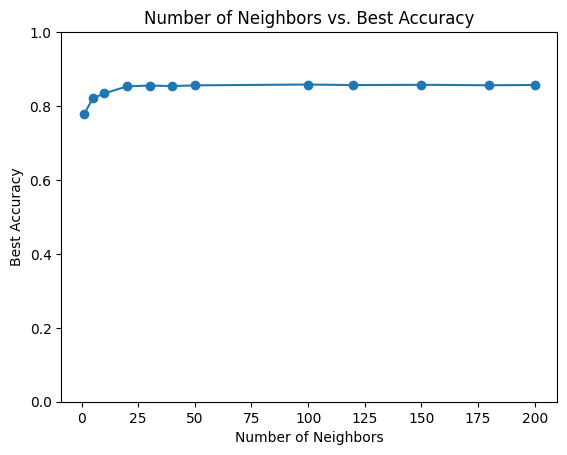

In [3]:
# Diferent values K will have in the NN Classifier
neighbor_values = [1, 5, 10, 20, 30, 40, 50, 100, 120, 150, 180, 200]

best_params = []

for n_neighbors in neighbor_values:
    best_accuracy = 0
    best_p = None
    best_metric = None

    for p in [1, 2]:

        for metric in ['euclidean', 'manhattan']:
            # Initialize the KNN classifier
            knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, metric=metric)

            # Perform cross-validation
            cv_scores = cross_val_score(knn_classifier, x_train, y_train, cv=10)  # CV is number of folds or cross validation

            # Check if current parameters result in better accuracy
            if cv_scores.mean() > best_accuracy:
                best_accuracy = cv_scores.mean()
                best_p = p
                best_metric = metric

    # Store the best parameters for this n_neighbors
    best_params.append({
        'n_neighbors': n_neighbors,
        'best_p': best_p,
        'best_metric': best_metric,
        'best_accuracy': best_accuracy
    })

# Print the results
for params in best_params:
    print(f'Best Parameters for {params["n_neighbors"]} neighbors: p={params["best_p"]}, Metric={params["best_metric"]}, Best Accuracy={params["best_accuracy"]:.4f}')

# Plot the results
plt.plot([params["n_neighbors"] for params in best_params], [params["best_accuracy"] for params in best_params], marker='o')
plt.title('Number of Neighbors vs. Best Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Best Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()



Aditionally, other algorithms where explored such as:

- Random Forest (RF)
- Logistic Regression
- Decission Tree
- Naive Bayes
- Support Vector Machine (SVM)

Random Forest

In [4]:
n_estimators_values = [1, 5, 10, 20, 30, 40, 50, 100, 120, 150, 180, 200]
test_accuracies = {}

for n_estimators in n_estimators_values:
    
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Cross-validation and get the mean accuracy
    cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=10, scoring='accuracy')   # 10 is the number of folds
    mean_cv_accuracy = np.mean(cv_scores)

    # Store the mean cross-validated accuracy
    test_accuracies[n_estimators] = mean_cv_accuracy


# Print the cross-validated accuracies for each value of n_estimators
for n_estimators, accuracy in test_accuracies.items():
    print(f"Decission trees = {n_estimators}: CV mean Accuracy = {accuracy:.4f}")

Decission trees = 1: CV mean Accuracy = 0.7292
Decission trees = 5: CV mean Accuracy = 0.7969
Decission trees = 10: CV mean Accuracy = 0.8122
Decission trees = 20: CV mean Accuracy = 0.8277
Decission trees = 30: CV mean Accuracy = 0.8370
Decission trees = 40: CV mean Accuracy = 0.8382
Decission trees = 50: CV mean Accuracy = 0.8440
Decission trees = 100: CV mean Accuracy = 0.8467
Decission trees = 120: CV mean Accuracy = 0.8477
Decission trees = 150: CV mean Accuracy = 0.8475
Decission trees = 180: CV mean Accuracy = 0.8470
Decission trees = 200: CV mean Accuracy = 0.8492


Logistic Regression

In [5]:
# Create a logistic regression model
model = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver options
    'max_iter': [10, 20, 50, 100, 200, 500, 1000]  # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Print the best parameters and their corresponding accuracy
print("Best Parameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')

# Print the mean accuracy across all folds
print(f'CV mean Accuracy: {np.mean(cv_scores):.4f}')

c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to 

Best Parameters:
{'C': 0.01, 'max_iter': 10, 'solver': 'newton-cg'}


c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


CV mean Accuracy: 0.8715


Decission tree

In [6]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 8, 12],
    'max_features': [None]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to make predictions on the testing data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy}")

# Evaluate the accuracy using cross-validation on the training data
cv_scores = cross_val_score(best_clf, x_train, y_train, cv=10)

# Print the mean accuracy across all folds
print(f'CV mean Accuracy: {np.mean(cv_scores):.4f}')

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 10}
Accuracy on Testing Data: 0.774
CV mean Accuracy: 0.7652


Bayesian Classifier

In [7]:
# Use MinMaxScaler to scale the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Define the hyperparameters to search
hyperparameters = {'alpha': range(0, 5)}

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, hyperparameters, cv=10)
grid_search.fit(x_train_scaled, y_train.values.ravel())

# Get the best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Create a new Multinomial Naive Bayes classifier with the best hyperparameter
mnb_classifier = MultinomialNB(alpha=best_alpha)

# Use cross-validation to measure accuracy on the training data
cv_scores = cross_val_score(mnb_classifier, x_train_scaled, y_train.values.ravel(), cv=10)

# Print the mean accuracy across all folds
print(f' CV mean Accuracy: {np.mean(cv_scores):.4f}')

Best Alpha: 0
 CV mean Accuracy: 0.8145


c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\Alejandro\Python\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, set

Support Vector Machine

In [8]:
# Define the hyperparameters and the model
hyperparameters = {'C': range(1, 5), 'kernel': ["linear", "poly", "rbf", "sigmoid"], 'gamma': ["scale", "auto"]}
clf = SVC()

# Define the grid search with cross-validation
GS = GridSearchCV(clf, hyperparameters, cv=10)
GS.fit(x_train, y_train.values.ravel())  # Run the grid search

# Get the best hyperparameters
best_C = GS.best_params_['C']
best_kernel = GS.best_params_['kernel']
best_gamma = GS.best_params_['gamma']
print("Best found C:{}, best found kernel: {}, best found gamma: {}".format(best_C, best_kernel, best_gamma))

# Create a new SVM model with the best hyperparameters
SVM = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(SVM, x_train, y_train.values.ravel(), cv=10)
average_accuracy = cross_val_scores.mean()

print("Average accuracy using cross-validation: {:.4f}".format(average_accuracy))

Best found C:2, best found kernel: linear, best found gamma: scale
Average accuracy using cross-validation: 0.8695


#### 2. Data reduction algorithms

Data recution algorithms were applied to the training part of the dataset in order to reduce complexity, more specifically the Condensed Nearest Neighbor (CNN) rule:

In [38]:
# Preliminary step: remove from S the outliers and the examples of the Bayes error region.

def clean_data(s):
    s1, s2 = train_test_split(s, test_size=0.5, random_state=42)  # Split randomly into S1 and S2

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    
    while True:

        # Classify S1 with S2 using the 1-NN rule
        knn.fit(s2.iloc[:, :-1], s2.iloc[:, -1])
        pred_s1 = knn.predict(s1.iloc[:, :-1])

        # Remove misclassified instances from S1
        misclassified_s1 = s1[s1.iloc[:, -1] != pred_s1]
        s1 = s1.drop(misclassified_s1.index)

        # Classify S2 with the new set S1 using the 1-NN rule
        knn.fit(s1.iloc[:, :-1], s1.iloc[:, -1])
        pred_s2 = knn.predict(s2.iloc[:, :-1])

        # Remove misclassified instances from S2
        misclassified_s2 = s2[s2.iloc[:, -1] != pred_s2]
        s2 = s2.drop(misclassified_s2.index)

        # Check for stabilization
        if len(misclassified_s1) == 0 and len(misclassified_s2) == 0:
            break

    # Scleaned = S1 ∪ S2
    scleaned = pd.concat([s1, s2])

    return scleaned

# Training set after preliminary step
df_train_cleaned = clean_data(df_train)
x_train_cleaned = df_train_cleaned.iloc[:, :-1]  # Features
y_train_cleaned = df_train_cleaned.iloc[:, -1]   # Class

# 2nd step remove the irrelevant examples (Condensed Nearest Neighbor Rule)

cnn = CondensedNearestNeighbour(sampling_strategy="all",n_neighbors=1, random_state=42)  # sampling_strategy="all" because the dataset is balanced
x_train_red, y_train_red = cnn.fit_resample(x_train_cleaned, y_train_cleaned.values.ravel())  
print("The training set went from size",len(x_train),"to size",len(x_train_red))

The training set went from size 3999 to size 387


In [46]:
# KNN Classifier before and after reduction of the training set

k_values = [1, 5, 10, 20, 30, 40, 50, 100, 120, 150, 180, 200]

# KNN for all the training set
accuracy = []
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(x_test)

    # Calculate the mean accuracy across folds
    mean_accuracy = accuracy_score(y_test, predictions)
    accuracy.append(mean_accuracy)

    # Print the mean accuracy for the current k value
    #print(f"Mean Accuracy for k = {k}: {mean_accuracy:.4f}")


# KNN for cleaned training set
accuracy_cleaned = []
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(x_train_cleaned, y_train_cleaned)

    # Make predictions on the test data
    predictions = knn_classifier.predict(x_test)

    # Calculate the mean accuracy across folds
    mean_accuracy = accuracy_score(y_test, predictions)
    accuracy_cleaned.append(mean_accuracy)
    # Print the mean accuracy for the current k value
    #print(f"Mean Accuracy for k = {k}: {mean_accuracy:.4f}")

comparison_table = pd.DataFrame({'N_Neighbors': k_values, 'Training set': accuracy, 'Training set reduced': accuracy_cleaned}, index=None)
print(comparison_table)

    N_Neighbors  Training set  Training set reduced
0             1         0.772                 0.809
1             5         0.824                 0.841
2            10         0.840                 0.853
3            20         0.851                 0.857
4            30         0.856                 0.850
5            40         0.866                 0.851
6            50         0.855                 0.849
7           100         0.864                 0.853
8           120         0.865                 0.845
9           150         0.861                 0.846
10          180         0.860                 0.840
11          200         0.866                 0.842


Another alternative for data reduction is using PCA. In this case, we will apply PCA to the training set

In [14]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.9)  # 90% of variance explained
features_pca = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i+1}' for i in range(features_pca.shape[1])]
df_x_pca = pd.DataFrame(data=features_pca, columns=columns_pca)

# Concatenate the principal components DataFrame with the target
df_pca = pd.concat([df_x_pca, y], axis=1)

# Print the results
print(f"Original number of features: {x.shape[1]}")
print(f"Number of features after PCA: {features_pca.shape[1]}")
print(f"Variance explained by the selected components: {pca.explained_variance_ratio_.sum():.4f}")

# Split the data into training and validation sets
x_train_pca, x_test_pca, y_train, y_test = train_test_split(df_x_pca, y, test_size=0.2, random_state=42)

# KNN Classifier with the PCA dataset

k_values = [1, 5, 10, 20, 30, 40, 50, 100, 120, 150, 180, 200]

# KNN for all the training set
accuracy = []
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(x_train_pca, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(x_test_pca)

    # Calculate the mean accuracy across folds
    mean_accuracy = accuracy_score(y_test, predictions)
    accuracy.append(mean_accuracy)

    # Print the mean accuracy for the current k value
    print(f"Mean Accuracy for k = {k}: {mean_accuracy:.4f}")

Original number of features: 21
Number of features after PCA: 15
Variance explained by the selected components: 0.9145
Mean Accuracy for k = 1: 0.7960
Mean Accuracy for k = 5: 0.8360
Mean Accuracy for k = 10: 0.8350
Mean Accuracy for k = 20: 0.8490
Mean Accuracy for k = 30: 0.8500
Mean Accuracy for k = 40: 0.8600
Mean Accuracy for k = 50: 0.8600
Mean Accuracy for k = 100: 0.8450
Mean Accuracy for k = 120: 0.8500
Mean Accuracy for k = 150: 0.8480
Mean Accuracy for k = 180: 0.8450
Mean Accuracy for k = 200: 0.8400


#### 3. Speeding-up the calculation of the 1NN with a brute force 1NN algorithm.

In [16]:
tree = KDTree(x_train) #setup the tree

t0_KDTree = time() #start of the timer
y_pred = np.take(y_train.values.ravel(),tree.query(x_test, k=1)[1],axis=0) #assign the value predicted
t1_KDTree = time() #end of the timer

#####

one_nn = KNeighborsClassifier(n_neighbors=1, metric="euclidean", p=1)
one_nn.fit(x_train, y_train.values.ravel())

t0_One_nn = time() #start of the timer
y_pred = one_nn.predict(x_test)
t1_One_nn = time() #end of the timer


print('the KDtrees computation takes %f' %(t1_KDTree-t0_KDTree))
print('the One-nn classifier takes %f' %(t1_One_nn-t0_One_nn))

the KDtrees computation takes 0.104525
the One-nn classifier takes 0.159505


#### 4. Generate artificial imbalancy

Distribution before imbalancing: Counter({2: 1695, 0: 1657, 1: 1647})


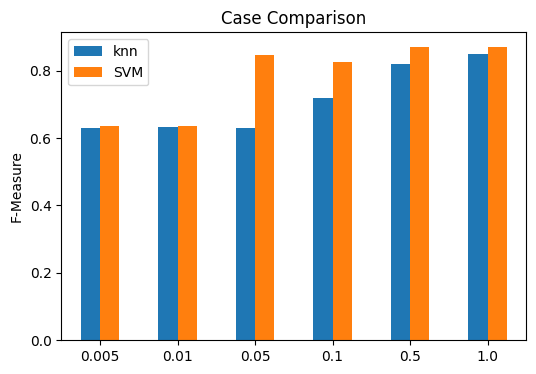

In [20]:
print(f'Distribution before imbalancing: {Counter(y.values.ravel())}')

hyperparameters = {'n_neighbors':range(1,150,10), 'p':range(1,6), 'metric':["euclidean", "manhattan"]}

ratio = [0.005, 0.01,0.05,0.1,0.5,1]
acc_score_knn = []

for i in range(len(ratio)):
    sample = int(Counter(y.values.ravel())[0]*ratio[i])
    x_res, y_res = make_imbalance(x, y, sampling_strategy={0:sample, 1:1647, 2:1695}, random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

    clf = KNeighborsClassifier()
    GS = GridSearchCV(clf, hyperparameters, cv=5) #define the grid search
    GS.fit(x_train, y_train.values.ravel()) #run the grid search
    knn = KNeighborsClassifier(n_neighbors=GS.best_params_['n_neighbors'], metric=GS.best_params_['metric'], p=GS.best_params_['p'])
    knn.fit(x_train, y_train.values.ravel())

    y_pred = knn.predict(x_test)
    acc_score_knn.append(f1_score(y_test, y_pred, average="macro"))

hyperparameters = {'C':range(1,5), 'kernel':["linear","poly","rbf","sigmoid"], 'gamma':["scale","auto"]}
acc_score_SVM = []

for i in range(len(ratio)):
    sample = int(Counter(y.values.ravel())[0]*ratio[i])
    x_res, y_res = make_imbalance(x, y, sampling_strategy={0:sample, 1:1647, 2:1695}, random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

    clf = SVC()
    GS = GridSearchCV(clf, hyperparameters, cv=5) #define the grid search
    GS.fit(x_train, y_train.values.ravel()) #run the grid search
    SVM = SVC(C=GS.best_params_['C'], kernel=GS.best_params_['kernel'], gamma=GS.best_params_['gamma'])
    SVM.fit(x_train, y_train.values.ravel())

    y_pred = SVM.predict(x_test)
    acc_score_SVM.append(f1_score(y_test, y_pred, average="macro"))

comp_f_measaure = pd.DataFrame({'knn': acc_score_knn, 'SVM': acc_score_SVM}, index=ratio)

# plot
ax = comp_f_measaure.plot(kind='bar', figsize=(6, 4), rot=0, title='Case Comparison', ylabel='F-Measure')
plt.show()